
# <span style="color:rgb(213,80,0)">Tutorial 5 \- Simulate CC\-CV Cycling</span>

## Introduction

In this tutorial, we will use a P2D model to simulate CC\-CV cycling. After completing this tutorial, you should have a working knowledge of:

-  How to define and modify cycling protocols in BattMo

We'll use the same model from Tutorial 1.


In [1]:
jsonstruct = parseBattmoJson('Examples/jsondatafiles/sample_input.json');


Parameters are defined in the JSON parameter file and parsed into the MATLAB structure. Once the JSON file has been read into MATLAB as a jsonstruct, its properties can be modified programmatically.

## Explore the Control Definition

Let's begin by reviewing the control protocol in BattMo, with the command:


In [2]:
disp(jsonstruct.Control)

         controlPolicy: 'CCDischarge'
                 DRate: 1
    lowerCutoffVoltage: 2.4000
    upperCutoffVoltage: 4.1000
             dIdtLimit: 0.0100
             dEdtLimit: 0.0100
            rampupTime: 0.1000


We see that the default control protocol is set to a constant current (galvanostatic) discharge. To change to a CC\-CV cycling protocol, we can use the command:


In [3]:
cccv_control_protocol = parseBattmoJson('cccv_control.json');
jsonstruct_modified = mergeJsonStructs({cccv_control_protocol, jsonstruct});

parameter Control.controlPolicy is assigned twice with different values. we use the value from first jsonstruct.
parameter Control.lowerCutoffVoltage is assigned twice with different values. we use the value from first jsonstruct.
parameter Control.upperCutoffVoltage is assigned twice with different values. we use the value from first jsonstruct.
parameter Control.dIdtLimit is assigned twice with different values. we use the value from first jsonstruct.
parameter Control.dEdtLimit is assigned twice with different values. we use the value from first jsonstruct.


Now we can explore the modified control protocol definition with the command:


In [4]:
disp(jsonstruct_modified.Control)

         controlPolicy: 'CCCV'
        initialControl: 'discharging'
        numberOfCycles: 3
                 CRate: 1.5000
                 DRate: 1
    lowerCutoffVoltage: 2.8000
    upperCutoffVoltage: 4
             dIdtLimit: 1.0000e-05
             dEdtLimit: 1.0000e-05
            rampupTime: 0.1000


Let's run the simulation and plot the cell voltage curve.


In [5]:
% run the simulation
output = runBatteryJson(jsonstruct_modified);

Solving timestep 01/45:                       -> 15 Seconds, 468 Milliseconds
Solving timestep 02/45: 15 Seconds, 468 Milliseconds -> 30 Seconds, 937 Milliseconds
Solving timestep 03/45: 30 Seconds, 937 Milliseconds -> 61 Seconds, 875 Milliseconds
Solving timestep 04/45: 61 Seconds, 875 Milliseconds -> 123 Seconds, 750 Milliseconds
Solving timestep 05/45: 123 Seconds, 750 Milliseconds -> 247 Seconds, 500 Milliseconds
Solving timestep 06/45: 247 Seconds, 500 Milliseconds -> 495 Seconds
Solving timestep 07/45: 495 Seconds           -> 990 Seconds
Solving timestep 08/45: 990 Seconds           -> 1485 Seconds
Solving timestep 09/45: 1485 Seconds          -> 1980 Seconds
Solving timestep 10/45: 1980 Seconds          -> 2475 Seconds
Solving timestep 11/45: 2475 Seconds          -> 2970 Seconds
Solving timestep 12/45: 2970 Seconds          -> 3465 Seconds
Solving timestep 13/45: 3465 Seconds          -> 1 Hour, 360 Seconds
switch control from CC_discharge1 to CC_discharge2
Solver did not conv


get the states



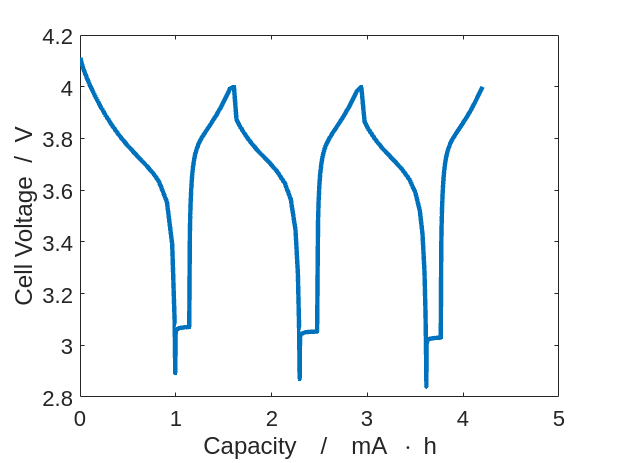

In [6]:
states = output.states;

% extract the time and voltage quantities
time = cellfun(@(state) state.time, states);
voltage = cellfun(@(state) state.('Control').E, states);
current = cellfun(@(state) state.('Control').I, states);

% calculate the capacity
capacity = time .* current;

% plot the discharge curve in the figure
plot(time/hour, voltage, '-', 'linewidth', 3)

% add plot annotations
xlabel('Capacity  /  mA \cdot h')
ylabel('Cell Voltage  /  V')

## Summary

In this tutorial, we explored how to modify material parameters in BattMo.

